# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import pandas as pd
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
api_key = "e1bfdfc85cfd25f5e4d7c94cc2fc1017"

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [46]:
latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)

In [47]:
latitude_and_Longitude = tuple(zip(latitude,longitude))

## Generate Cities List

In [48]:
cities = []
country = []

for lat,lon in latitude_and_Longitude:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)

print((len(set(cities))))

808


In [49]:
df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''

In [50]:
df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')

In [51]:
for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key)
    
    
    country_info = requests.get(api_url).json()
    
    
    print(api_url)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('No Info')

http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=baykit,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/s

http://api.openweathermap.org/data/2.5/forecast?q=torbay,ca&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=kruisfontein,za&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=alofi,nu&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=rafsanjan,ir&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=arraial do cabo,br&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=provideniya,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=sterling,us&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/anaconda3/lib/python3.7/s

http://api.openweathermap.org/data/2.5/forecast?q=sur,om&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=skelleftea,se&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=jamestown,sh&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=khatanga,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=abancay,pe&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=bluff,nz&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=tasiilaq,gl&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=cape town,za&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc10

http://api.openweathermap.org/data/2.5/forecast?q=seoul,kr&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=mayo,ca&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=senneterre,ca&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=attawapiskat,ca&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
No Info
http://api.openweathermap.org/data/2.5/forecast?q=barrow,us&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=pevek,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=cherskiy,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=samana,do&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc

http://api.openweathermap.org/data/2.5/forecast?q=kaduqli,sd&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=olinda,br&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=kutum,sd&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=jucurutu,br&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=yellowknife,ca&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=manado,id&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=barawe,so&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
No Info
http://api.openweathermap.org/data/2.5/forecast?q=hithadhoo,mv&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94

http://api.openweathermap.org/data/2.5/forecast?q=hirara,jp&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=oeiras,br&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=esperance,au&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=guerrero negro,mx&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=sibolga,id&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=sayat,tm&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=mahebourg,mu&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=nikolskoye,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94

http://api.openweathermap.org/data/2.5/forecast?q=palmer,us&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=mayor pablo lagerenza,py&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=kluczbork,pl&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=chernaya kholunitsa,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=tyup,kg&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=ancud,cl&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=zeya,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=sayan,pe&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5

http://api.openweathermap.org/data/2.5/forecast?q=karratha,au&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=jujuy,ar&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
No Info
http://api.openweathermap.org/data/2.5/forecast?q=plettenberg bay,za&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=fukagawa,jp&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=norman wells,ca&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=olafsvik,is&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=tecoanapa,mx&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=cabedelo,br&units=IMPERIAL&mode=json&APPID=e1bfdfc8

http://api.openweathermap.org/data/2.5/forecast?q=marsaxlokk,mt&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=kota kinabalu,my&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=turayf,sa&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=wahpeton,us&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=vangaindrano,mg&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=puqi,cn&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=kazanka,ua&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=pondicherry,in&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4

http://api.openweathermap.org/data/2.5/forecast?q=lavrentiya,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=batagay-alyta,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=burnie,au&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=gobabis,na&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=nynashamn,se&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=ternate,id&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=russkaya polyana,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=college,us&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25

http://api.openweathermap.org/data/2.5/forecast?q=luang prabang,la&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=salinopolis,br&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=zharkent,kz&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=black river,jm&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=dutlwe,bw&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=louisbourg,ca&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
No Info
http://api.openweathermap.org/data/2.5/forecast?q=atasu,kz&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=denpasar,id&units=IMPERIAL&mode=json&APPID=e1bfdfc85

http://api.openweathermap.org/data/2.5/forecast?q=achim,de&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=denizli,tr&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=lobito,ao&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=karur,in&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=porto velho,br&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=indian head,ca&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=manzil tamim,tn&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
No Info
http://api.openweathermap.org/data/2.5/forecast?q=saleaula,ws&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5

http://api.openweathermap.org/data/2.5/forecast?q=suchitoto,sv&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=manakara,mg&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=mananjary,mg&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=alugan,ph&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=yamada,jp&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=azuaga,es&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=deep river,ca&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=zhengjiatun,cn&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94c

http://api.openweathermap.org/data/2.5/forecast?q=guilin,cn&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=sabha,ly&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=kosh-agach,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=abu dhabi,ae&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=nouadhibou,mr&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=harindanga,in&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=tashtyp,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=kaspiyskiy,ru&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c9

http://api.openweathermap.org/data/2.5/forecast?q=sainte-suzanne,re&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=effingham,us&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=cran-gevrier,fr&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=janakpur,np&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=yambio,sd&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
No Info
http://api.openweathermap.org/data/2.5/forecast?q=taree,au&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=oussouye,sn&units=IMPERIAL&mode=json&APPID=e1bfdfc85cfd25f5e4d7c94cc2fc1017
http://api.openweathermap.org/data/2.5/forecast?q=dicabisagan,ph&units=IMPERIAL&mode=json&APPID=e1bfdfc8

In [96]:
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

df_countries.head(500)

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,rikitea,pf,-23.1203,-134.9692,76.84,74.0,99.0,0.43
1,baykit,ru,61.6700,96.3700,22.80,94.0,46.0,3.20
2,torbay,ca,47.6666,-52.7314,40.71,86.0,52.0,21.21
3,kruisfontein,za,-34.0033,24.7314,64.33,54.0,100.0,2.80
4,hobart,au,-42.8794,147.3294,49.87,75.0,76.0,8.88
...,...,...,...,...,...,...,...,...
995,cangzhou,cn,38.3167,116.8667,49.55,38.0,0.0,9.13
996,boyolangu,id,-8.1181,111.8935,75.96,81.0,54.0,1.83
998,benguela,ao,-12.5763,13.4055,79.25,81.0,21.0,4.41
1001,dubai,ae,25.2582,55.3047,86.13,44.0,40.0,9.93


In [ ]:
length_of_original_DF = len(df_countries)
length_after_dropna = len(df_countries.dropna())

missing_weather_info = length_of_original_DF - length_after_dropna

In [ ]:
df_countries = df_countries.dropna()
df_countries.to_csv(path_or_buf='countries.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [87]:
df_countries_table = df_countries.copy()
df_countries_table['Latitude'] = pd.qcut(df_countries['Latitude'],11,precision=0)

cm = sns.light_palette('green',as_cmap=True)

df_countries_table.groupby(['Latitude'])['Temperature (F)'].mean().reset_index()

,Latitude,Temperature (F)
0,"(-56.0, -29.0]",59.604848
1,"(-29.0, -15.0]",72.877727
2,"(-15.0, -3.0]",77.096970
3,"(-3.0, 9.0]",79.639697
4,"(9.0, 19.0]",82.013030
5,"(19.0, 28.0]",75.585538
6,"(28.0, 39.0]",55.766818
7,"(39.0, 49.0]",46.089545
8,"(49.0, 55.0]",36.775000
9,"(55.0, 63.0]",33.253485


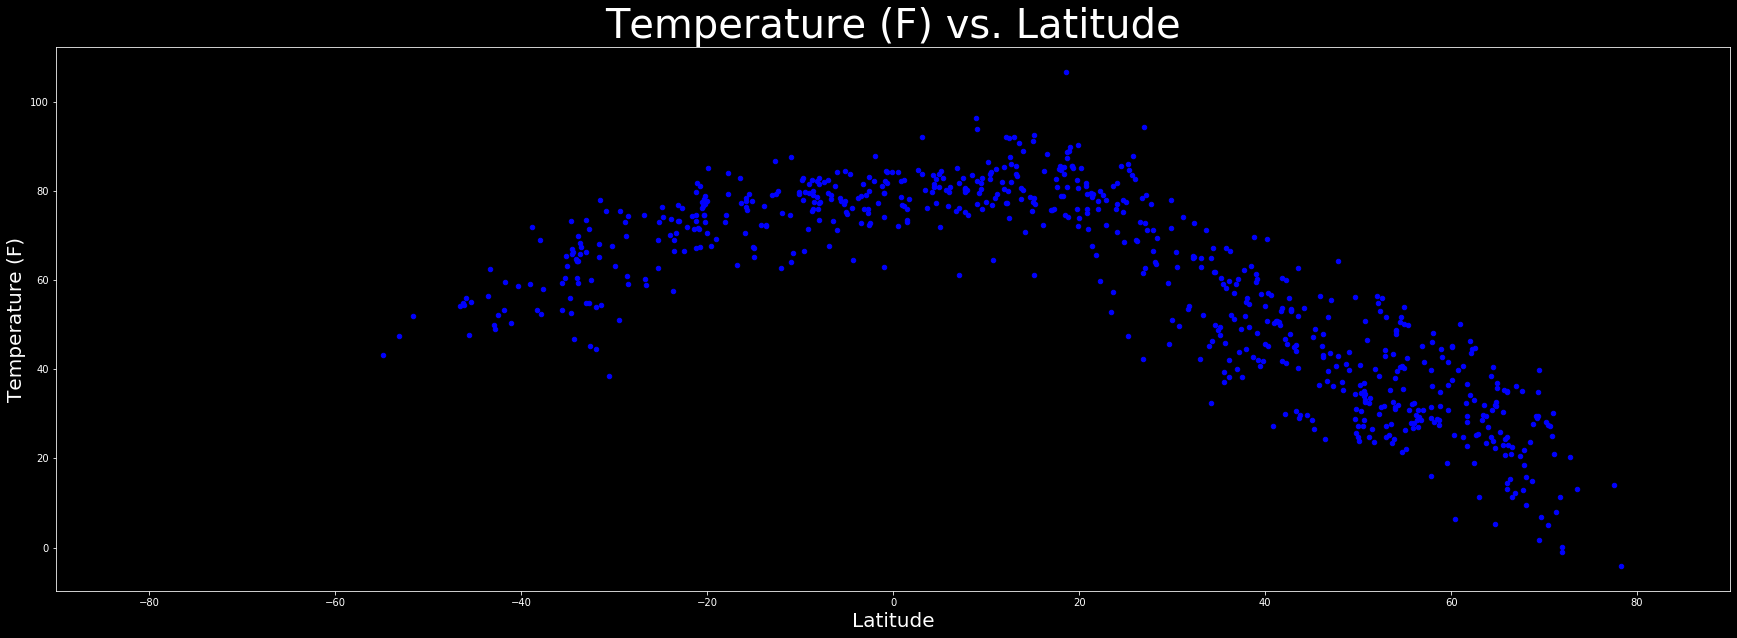

In [88]:
plt.figure(figsize=(30,10))
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'],color = 'blue',s=20)
plt.title('Temperature (F) vs. Latitude',fontsize=(40));
plt.xlim(-90,90)
plt.ylabel('Temperature (F)',fontsize=(20));
plt.xlabel('Latitude',fontsize=(20));

#### Latitude vs. Humidity Plot

In [68]:
df_countries_table.groupby(['Latitude'])['Humidity (%)'].mean().reset_index()

,Latitude,Humidity (%)
0,"(-56.0, -29.0]",65.484848
1,"(-29.0, -15.0]",65.939394
2,"(-15.0, -3.0]",74.636364
3,"(-3.0, 9.0]",75.000000
4,"(9.0, 19.0]",54.257576
5,"(19.0, 28.0]",49.461538
6,"(28.0, 39.0]",54.984848
7,"(39.0, 49.0]",54.803030
8,"(49.0, 55.0]",73.575758
9,"(55.0, 63.0]",87.045455


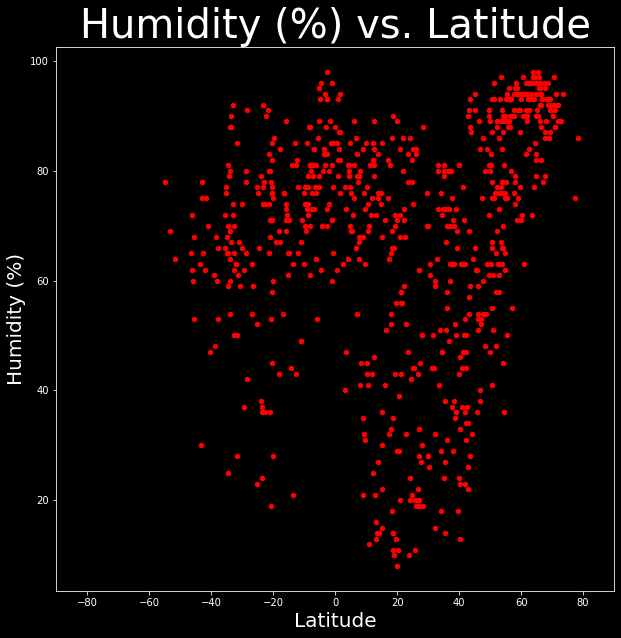

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(df_countries['Latitude'],df_countries['Humidity (%)'],color = 'red',s=20);
plt.title('Humidity (%) vs. Latitude',fontsize=(40));
plt.xlim(-90,90)
plt.ylabel('Humidity (%)',fontsize=(20));
plt.xlabel('Latitude',fontsize=(20));

#### Latitude vs. Cloudiness Plot

In [72]:
df_countries_table.groupby(['Latitude'])['Cloudiness (%)'].mean().reset_index()

,Latitude,Cloudiness (%)
0,"(-56.0, -29.0]",60.863636
1,"(-29.0, -15.0]",46.015152
2,"(-15.0, -3.0]",64.303030
3,"(-3.0, 9.0]",57.621212
4,"(9.0, 19.0]",44.212121
5,"(19.0, 28.0]",40.230769
6,"(28.0, 39.0]",43.196970
7,"(39.0, 49.0]",49.363636
8,"(49.0, 55.0]",54.530303
9,"(55.0, 63.0]",64.696970


#### Latitude vs. Wind Speed Plot

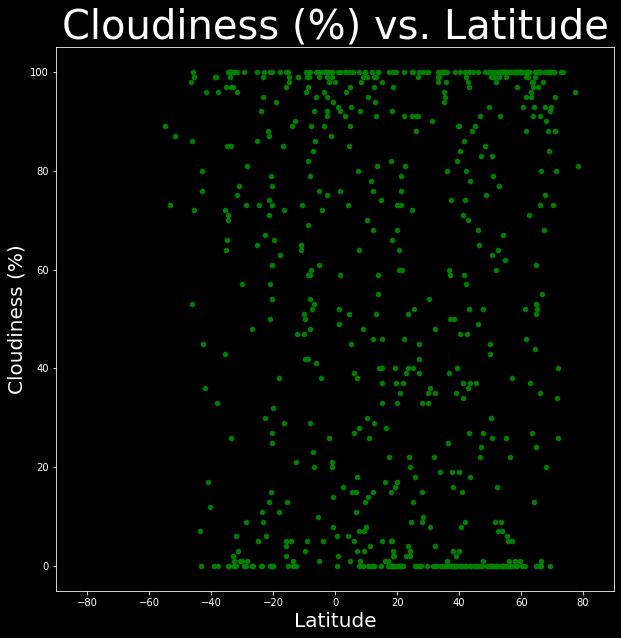

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(df_countries['Latitude'],df_countries['Cloudiness (%)'],color = 'green',s=20);
plt.title('Cloudiness (%) vs. Latitude',fontsize=(40));
plt.xlim(-90,90)
plt.ylabel('Cloudiness (%)',fontsize=(20));
plt.xlabel('Latitude',fontsize=(20));

In [89]:
df_countries_table.groupby(['Latitude'])['Wind Speed (mph)'].mean().reset_index()

,Latitude,Wind Speed (mph)
0,"(-56.0, -29.0]",9.253485
1,"(-29.0, -15.0]",8.075758
2,"(-15.0, -3.0]",5.278030
3,"(-3.0, 9.0]",4.954091
4,"(9.0, 19.0]",7.251364
5,"(19.0, 28.0]",9.632769
6,"(28.0, 39.0]",9.106818
7,"(39.0, 49.0]",8.566212
8,"(49.0, 55.0]",7.513939
9,"(55.0, 63.0]",7.933636


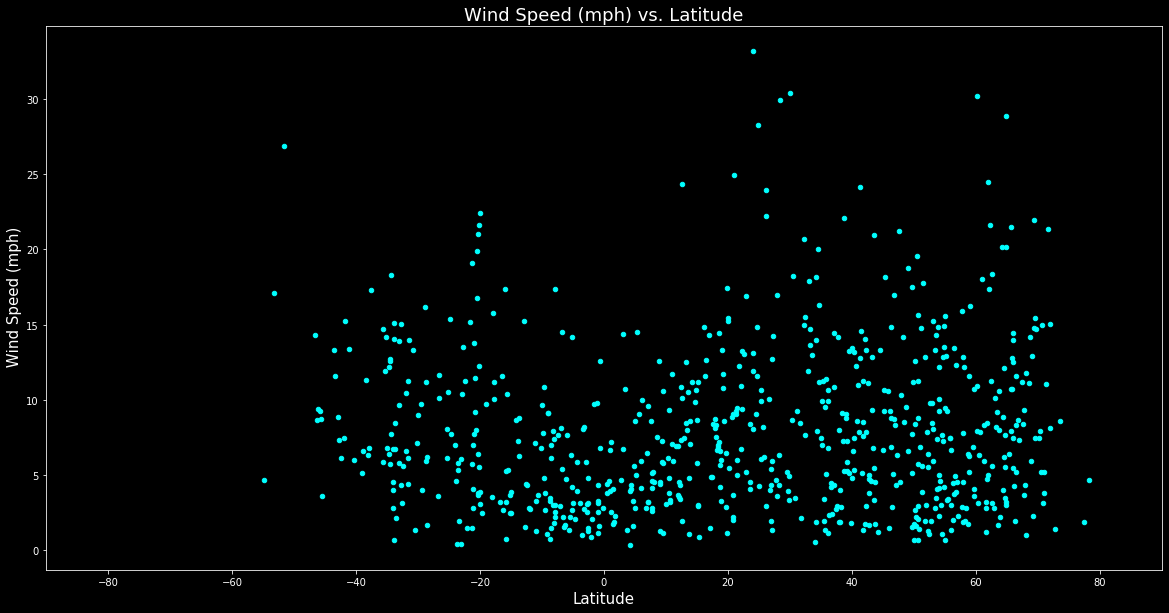

In [95]:
plt.figure(figsize=(20,10))
plt.scatter(df_countries['Latitude'],df_countries['Wind Speed (mph)'],color = 'cyan',s=20);
plt.xlim(-90,90)
plt.title('Wind Speed (mph) vs. Latitude',fontsize=(18));
plt.ylabel(' Wind Speed (mph)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));

In [ ]:
Conlusions: 
    
    #Temp vs Latitude - Latitude increases direct propritonaly with Tempertaure
    #Wind vs Latitude - Wind Speed tends to be under 10mphs 
    # Cloudiness - Tends to be either around 0% or 100%

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


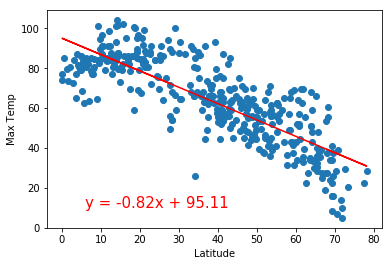

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


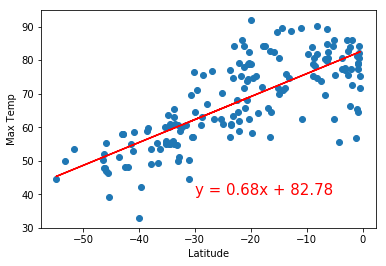

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


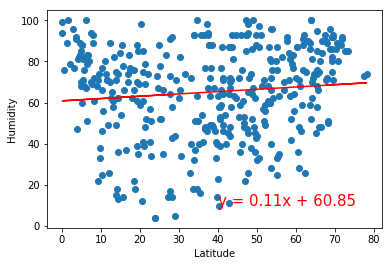

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


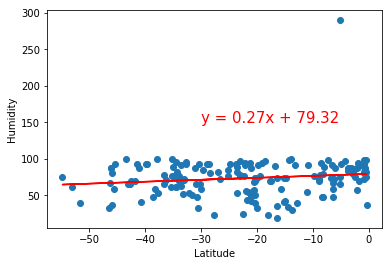

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


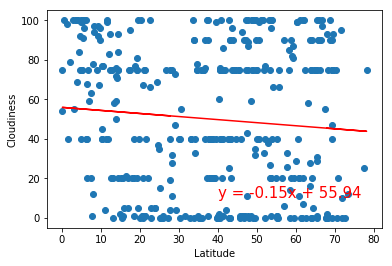

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


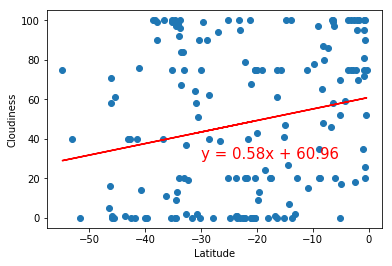

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


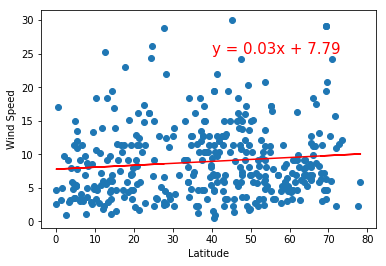

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


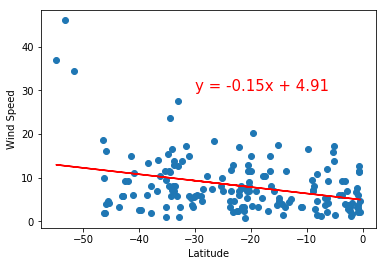